In [1]:
# IMPORTS

# library(reshape2)
library(ComplexHeatmap)
library(RColorBrewer)
library(dplyr)
library(tibble)
library(tidyr)



Loading required package: grid

ComplexHeatmap version 2.14.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Chromosome order
chrOrder <-
    c(paste("chr", 1:22, sep = ""), "chrX")
chrOrder

[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"

In [3]:
# Load SV data

# data1 <- read.table("../lenient_filterFALSE.tsv",
data1 <- read.table("../stringent_filterTRUE.tsv",
    sep = "\t",
    header = T,
    comment.char = ""
)
head(data1)


,chrom,start,end,sample,cell,class,scalar,num_bins,sv_call_name,sv_call_haplotype,sv_call_name_2nd,sv_call_haplotype_2nd,llr_to_ref,llr_to_2nd,af
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20401,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,2.5777103,0.39
2,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20402,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,8.5691748,0.39
3,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20403,CW,1,1,dup_h1,2010,idup_h2,1011,Inf,2.1808285,0.16
4,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20406,WC,1,1,dup_h1,2010,idup_h1,1110,Inf,0.5313134,0.16
5,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20407,CC,1,1,idup_h2,1011,idup_h1,1110,Inf,3.4137543,0.39
6,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20408,WC,1,1,idup_h1,1110,dup_hom,2020,Inf,3.2372176,0.39


In [4]:
# Create Dataframe for chromosomes missing SVs

chrom = as.vector(setdiff(chrOrder, data1$chrom))
start = rep(0, length(setdiff(chrOrder, data1$chrom)))
end = rep(0, length(setdiff(chrOrder, data1$chrom)))
sample <- rep(data1$sample[1][1], length(setdiff(chrOrder, data1$chrom)))
cell <- rep(data1$cell[1][1], length(setdiff(chrOrder, data1$chrom)))
class <- rep("NA", length(setdiff(chrOrder, data1$chrom)))
scalar <- rep(0, length(setdiff(chrOrder, data1$chrom)))
num_bins <- rep(0, length(setdiff(chrOrder, data1$chrom)))
sv_call_name <- rep("none", length(setdiff(chrOrder, data1$chrom)))
sv_call_haplotype <- rep(0, length(setdiff(chrOrder, data1$chrom)))
sv_call_name_2nd <- rep("NA", length(setdiff(chrOrder, data1$chrom)))
sv_call_haplotype_2nd <- rep(0, length(setdiff(chrOrder, data1$chrom)))
llr_to_ref <- rep(0, length(setdiff(chrOrder, data1$chrom)))
llr_to_2nd <- rep(0, length(setdiff(chrOrder, data1$chrom)))
af <- rep(0, length(setdiff(chrOrder, data1$chrom)))

data1_missing <- data.frame(
    chrom,
    start,
    end,
    sample,
    cell,
    class,
    scalar,
    num_bins,
    sv_call_name,
    sv_call_haplotype,
    sv_call_name_2nd,
    sv_call_haplotype_2nd,
    llr_to_ref,
    llr_to_2nd,
    af
)


head(data1_missing)

# Bind existing dataframe and new one

data1 <- rbind(data1, data1_missing)


,chrom,start,end,sample,cell,class,scalar,num_bins,sv_call_name,sv_call_haplotype,sv_call_name_2nd,sv_call_haplotype_2nd,llr_to_ref,llr_to_2nd,af
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr5,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0
2,chr6,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0
3,chr11,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0
4,chr12,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0
5,chr14,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0
6,chr15,0,0,RPE1_Mix,BM510x3PE20401,NA,0,0,none,0,NA,0,0,0,0


In [5]:

data1$chrom <-
    factor(data1$chr, levels = chrOrder)


data1 <- data1[order(data1$chrom), ]
data1$pos = paste0(data1$chrom, "_", data1$start, "_", data1$end)
head(data1)

,chrom,start,end,sample,cell,class,scalar,num_bins,sv_call_name,sv_call_haplotype,sv_call_name_2nd,sv_call_haplotype_2nd,llr_to_ref,llr_to_2nd,af,pos
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20401,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,2.5777103,0.39,chr1_16600000_16800000
2,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20402,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,8.5691748,0.39,chr1_16600000_16800000
3,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20403,CW,1,1,dup_h1,2010,idup_h2,1011,Inf,2.1808285,0.16,chr1_16600000_16800000
4,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20406,WC,1,1,dup_h1,2010,idup_h1,1110,Inf,0.5313134,0.16,chr1_16600000_16800000
5,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20407,CC,1,1,idup_h2,1011,idup_h1,1110,Inf,3.4137543,0.39,chr1_16600000_16800000
6,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20408,WC,1,1,idup_h1,1110,dup_hom,2020,Inf,3.2372176,0.39,chr1_16600000_16800000


In [6]:
lite_data <- select(data1, c("pos", "cell", "sv_call_name"))
head(lite_data)

,pos,cell,sv_call_name
,<chr>,<chr>,<chr>
1,chr1_16600000_16800000,BM510x3PE20401,idup_h1
2,chr1_16600000_16800000,BM510x3PE20402,idup_h1
3,chr1_16600000_16800000,BM510x3PE20403,dup_h1
4,chr1_16600000_16800000,BM510x3PE20406,dup_h1
5,chr1_16600000_16800000,BM510x3PE20407,idup_h2
6,chr1_16600000_16800000,BM510x3PE20408,idup_h1


,chrom,start,end,sample,cell,class,scalar,num_bins,sv_call_name,sv_call_haplotype,sv_call_name_2nd,sv_call_haplotype_2nd,llr_to_ref,llr_to_2nd,af,pos,color
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20401,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,2.5777103,0.39,chr1_16600000_16800000,#CBD5E8
2,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20402,WW,1,1,idup_h1,1110,idup_h2,1011,Inf,8.5691748,0.39,chr1_16600000_16800000,#CBD5E8
3,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20403,CW,1,1,dup_h1,2010,idup_h2,1011,Inf,2.1808285,0.16,chr1_16600000_16800000,#CBD5E8
4,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20406,WC,1,1,dup_h1,2010,idup_h1,1110,Inf,0.5313134,0.16,chr1_16600000_16800000,#CBD5E8
5,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20407,CC,1,1,idup_h2,1011,idup_h1,1110,Inf,3.4137543,0.39,chr1_16600000_16800000,#CBD5E8
6,chr1,16600000,16800000,RPE1_Mix,BM510x3PE20408,WC,1,1,idup_h1,1110,dup_hom,2020,Inf,3.2372176,0.39,chr1_16600000_16800000,#CBD5E8


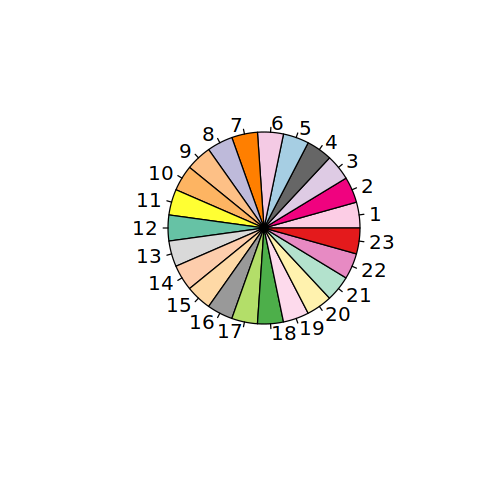

In [7]:
set.seed(2)
options(repr.plot.width = 4, repr.plot.height = 4)

n <- length(unique(data1$chrom))
qual_col_pals <- brewer.pal.info[brewer.pal.info$category == "qual", ]
col_vector <- unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1, n), col = sample(col_vector, n))

chrom <- unique(data1$chrom)
colors_chroms <- sample(col_vector, length(chrom))
# Instanciate data$color column
data1$color <- "NA"
# Iterate over chrom to attribute color
for (i in 1:length(chrom)) {
    chrom_index_list <- which(data1$chrom == chrom[i])
    data1[chrom_index_list, "color"] <- colors_chroms[i]
}
dd <- unique(select(data1, c("chrom", "color")))
# data1
head(data1)


In [8]:
lite_data_clustering <- select(data1, c("pos", "cell", "llr_to_ref", "af"))
lite_data_clustering[c("llr_to_ref")][sapply(lite_data_clustering[c("llr_to_ref")], is.infinite)] <- max(lite_data_clustering$llr_to_ref[is.finite(lite_data_clustering$llr_to_ref)])
# lite_data_clustering[is.na(lite_data_clustering)] <- 0
head(lite_data_clustering)

,pos,cell,llr_to_ref,af
,<chr>,<chr>,<dbl>,<dbl>
1,chr1_16600000_16800000,BM510x3PE20401,353.4376,0.39
2,chr1_16600000_16800000,BM510x3PE20402,353.4376,0.39
3,chr1_16600000_16800000,BM510x3PE20403,353.4376,0.16
4,chr1_16600000_16800000,BM510x3PE20406,353.4376,0.16
5,chr1_16600000_16800000,BM510x3PE20407,353.4376,0.39
6,chr1_16600000_16800000,BM510x3PE20408,353.4376,0.39


In [9]:
range01 <- function(x) {
    100 * ((x - min(x)) / (max(x) - min(x)))
}

lite_data_clustering <- select(data1, c("pos", "cell", "llr_to_ref"))
lite_data_clustering[c("llr_to_ref")][sapply(lite_data_clustering[c("llr_to_ref")], is.infinite)] <- max(lite_data_clustering$llr_to_ref[is.finite(lite_data_clustering$llr_to_ref)])
lite_data_clustering[is.na(lite_data_clustering)] <- 0
lite_data_clustering$llr_to_ref = range01(lite_data_clustering$llr_to_ref)

# lite_data_clustering
lite_data_pivot_clustering = lite_data_clustering %>%
    pivot_wider(
        names_from = "cell",
        values_from = "llr_to_ref"
    )
t_lite_data_pivot_clustering = t(lite_data_pivot_clustering)
header.true <- function(df) {
    names(df) <- as.character(unlist(df[1, ]))
    df[-1, ]
}

colnames(t_lite_data_pivot_clustering) <- t_lite_data_pivot_clustering[1, ]
t_lite_data_pivot_clustering <- t_lite_data_pivot_clustering[-1, ]
# range01(s)
t_lite_data_pivot_clustering[is.na(t_lite_data_pivot_clustering)] <- 0

# t_lite_data_pivot_clustering[-1, ] = t_lite_data_pivot_clustering[-1, ] * 100
t_lite_data_pivot_clustering_num = matrix(as.double(t_lite_data_pivot_clustering), ncol = ncol(t_lite_data_pivot_clustering))
rownames(t_lite_data_pivot_clustering_num) = rownames(t_lite_data_pivot_clustering)
colnames(t_lite_data_pivot_clustering_num) <- colnames(t_lite_data_pivot_clustering)



In [10]:
lite_data_pivot = lite_data %>%
    pivot_wider(
        names_from = "cell",
        values_from = "sv_call_name"
    )
t_lite_data_pivot = t(lite_data_pivot)
header.true <- function(df) {
    names(df) <- as.character(unlist(df[1, ]))
    df[-1, ]
}
colnames(t_lite_data_pivot) <- t_lite_data_pivot[1, ]
t_lite_data_pivot <- t_lite_data_pivot[-1, ] 

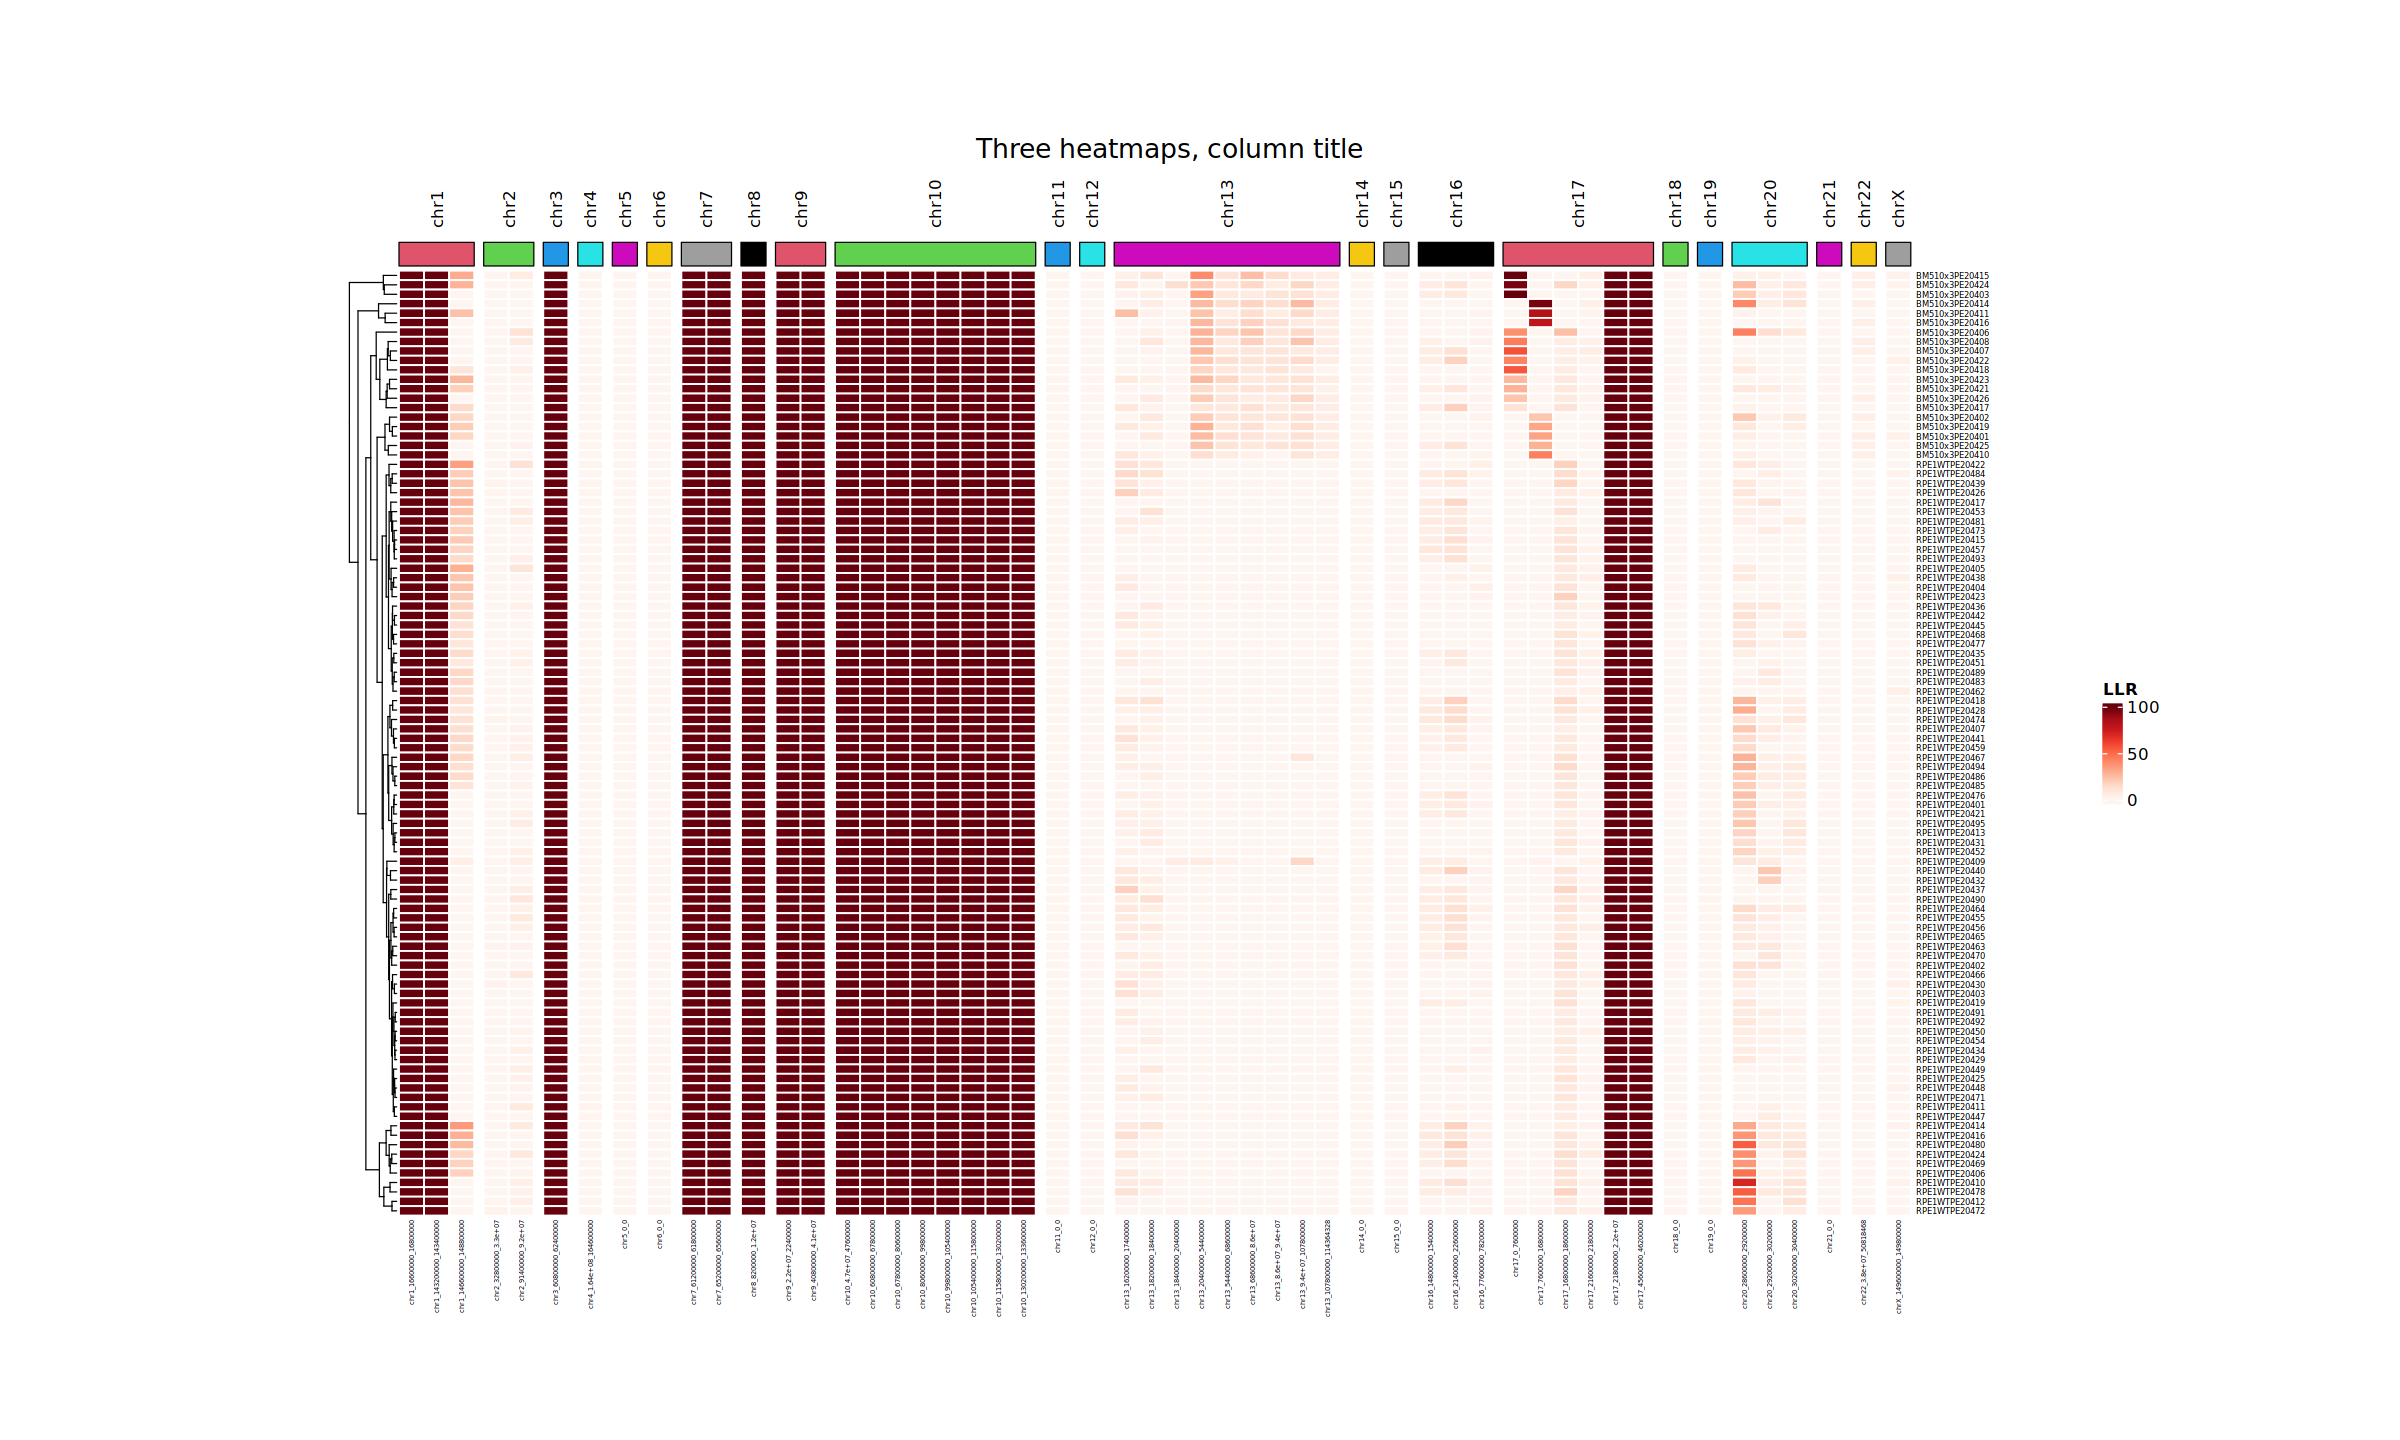

In [16]:

options(repr.plot.width = 20, repr.plot.height = 12)
anno_colors <- list(Chroms = unique(data1$chrom))
col_annotation <- sapply(strsplit(lite_data_pivot_clustering$pos, "_"), `[`, 1)
# colnames(col_annotation) <- "Chroms"
col_test = factor(sapply(strsplit(colnames(t_lite_data_pivot_clustering_num), "_"), `[`, 1), levels = unique(sapply(strsplit(colnames(t_lite_data_pivot_clustering_num), "_"), `[`, 1)))
cl_h = Heatmap(as.matrix(t_lite_data_pivot_clustering_num),
    name = "LLR", col = RColorBrewer::brewer.pal(name="Reds", n=9),
    # column_title = "a discrete numeric matrix",
    rect_gp = gpar(col = "white", lwd = 1.5),
    # top_annotation = ComplexHeatmap::HeatmapAnnotation(df = col_test, col = list(Chroms = anno_colors), text = anno_text(col_annotation, rot=90)),
    top_annotation = ComplexHeatmap::HeatmapAnnotation(
        # box = anno_density(t_lite_data_pivot_tmp_num, type="violin", height = unit(40, "mm"),  gp = gpar(fill = 1:10)),
        foo = anno_block(gp = gpar(fill = 2:24))
    ),
    column_split = col_test,
    width = unit(32, "cm"), height = unit(20, "cm"),
    row_names_gp = gpar(fontsize = 5),
    column_names_gp = gpar(fontsize = 4),
    # column_order = col_test,
    column_title_gp = gpar(fontsize = 10),
    cluster_columns = FALSE,
    column_gap = unit(2, "mm"),
    cluster_column_slices = FALSE,
    # title_gp = gpar(fontsize = 10),
    column_title_rot = 90,
    # use_raster = TRUE, raster_by_magick = TRUE, raster_quality=10
)

ht_opt$TITLE_PADDING <- unit(c(8.5, 8.5), "points")
draw(cl_h,
    # row_title = "Three heatmaps, row title", row_title_gp = gpar(col = "red"),
    column_title = "Three heatmaps, column title", column_title_gp = gpar(fontsize = 16)
)


[1] chr1  chr1  chr1  chr2  chr2  chr3  chr4  chr5  chr6  chr7  chr7  chr8 
[13] chr9  chr9  chr10 chr10 chr10 chr10 chr10 chr10 chr10 chr10 chr11 chr12
[25] chr13 chr13 chr13 chr13 chr13 chr13 chr13 chr13 chr13 chr14 chr15 chr16
[37] chr16 chr16 chr17 chr17 chr17 chr17 chr17 chr17 chr18 chr19 chr20 chr20
[49] chr20 chr21 chr22 chrX 
23 Levels: chr1 chr2 chr3 chr4 chr5 chr6 chr7 chr8 chr9 chr10 chr11 ... chrX

Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`.”


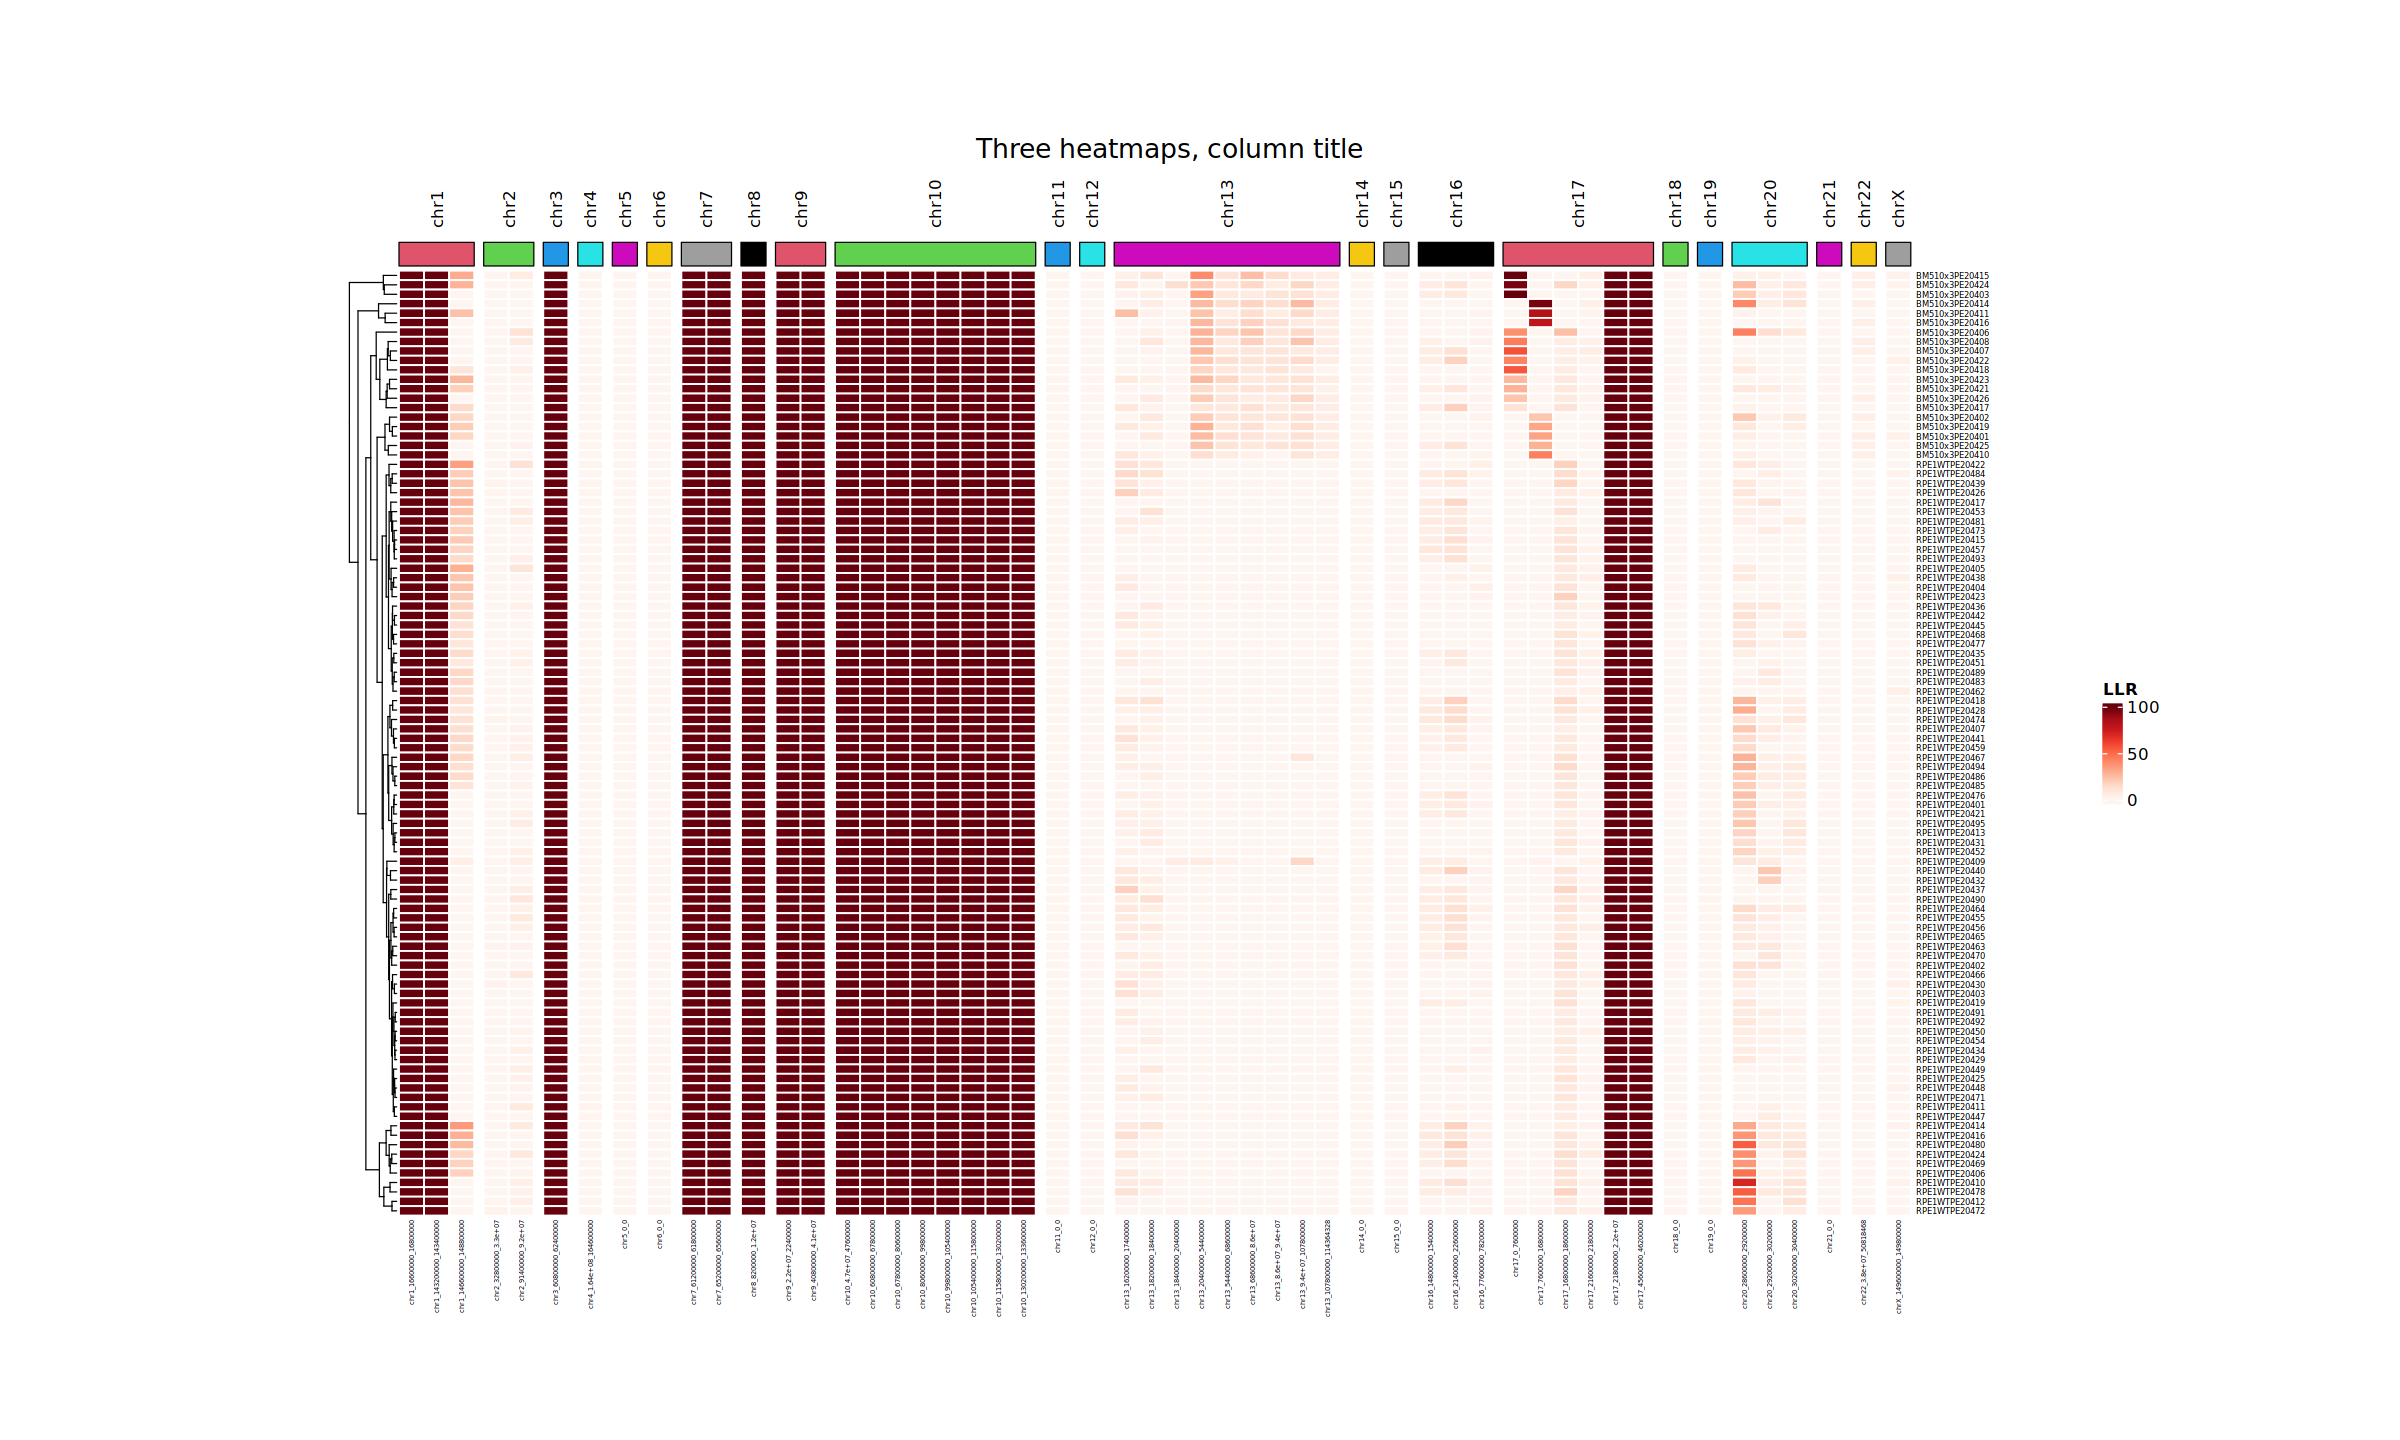

In [17]:
# SV list
sv_list <-
    c(
        "none",
        "del_h1",
        "del_h2",
        "del_hom",
        "dup_h1",
        "dup_h2",
        "dup_hom",
        "inv_h1",
        "inv_h2",
        "inv_hom",
        "idup_h1",
        "idup_h2",
        "complex"
    )

# SV type colors
colors <-
    structure(
        c(
            "grey",
            "#77AADD",
            "#4477AA",
            "#114477",
            "#CC99BB",
            "#AA4488",
            "#771155",
            "#DDDD77",
            "#AAAA44",
            "#777711",
            "#DDAA77",
            "#AA7744",
            "#774411"
        ),
        names = sv_list
    )




t_lite_data_pivot[is.na(t_lite_data_pivot)] <- "none"


options(repr.plot.width = 20, repr.plot.height = 12)
anno_colors <- list(Chroms = unique(data1$chrom))
col_annotation <- as.data.frame(sapply(strsplit(lite_data_pivot$pos, "_"), `[`, 1))
colnames(col_annotation) <- "Chroms"
col_test = factor(sapply(strsplit(colnames(t_lite_data_pivot), "_"), `[`, 1), levels = unique(sapply(strsplit(colnames(t_lite_data_pivot), "_"), `[`, 1)))
col_test



Heatmap(as.matrix(t_lite_data_pivot),
    name = "SV type", col = colors,
    # column_title = "a discrete numeric matrix",
    rect_gp = gpar(col = "white", lwd = 1.5),
    top_annotation = ComplexHeatmap::HeatmapAnnotation(
        foo = anno_block(gp = gpar(fill = 2:24))
    ),
    column_split = col_test,
    width = unit(32, "cm"), height = unit(20, "cm"),
    row_names_gp = gpar(fontsize = 5),
    column_names_gp = gpar(fontsize = 4),
    column_title_gp = gpar(fontsize = 10),

    column_gap = unit(2, "mm"),
    # column_order = order(as.numeric(sapply(strsplit(gsub("chr", "", colnames(t_lite_data_pivot)), "_"), `[`, 1))),
    row_order = row_order(cl_h),
    column_title_rot = 90,
    # use_raster = TRUE, raster_by_magick = TRUE, raster_quality=10
  )

ht_opt$TITLE_PADDING <- unit(c(8.5, 8.5), "points")
draw(cl_h,
    # row_title = "Three heatmaps, row title", row_title_gp = gpar(col = "red"),
    column_title = "Three heatmaps, column title", column_title_gp = gpar(fontsize = 16)
)

In [13]:
row_order = row_order(cl_h)
cell = rownames(t_lite_data_pivot)[row_order]
index = seq(1,length(cell))
cluster_order_df = data.frame(index, row_order, cell)
cluster_order_df
write.table(cluster_order_df, file = "test.tsv", sep = "\t", row.names = FALSE, quote=FALSE)

Warning message:
“The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`.”


index,row_order,cell
<int>,<int>,<chr>
1,10,BM510x3PE20415
2,18,BM510x3PE20424
3,3,BM510x3PE20403
4,9,BM510x3PE20414
5,8,BM510x3PE20411
6,11,BM510x3PE20416
7,4,BM510x3PE20406
8,6,BM510x3PE20408
9,5,BM510x3PE20407
